In [2]:
import numpy as np
np.set_printoptions(precision=3)
import scipy
import scipy.ndimage
import cv2
import matplotlib
import matplotlib.pyplot as plt

high_pass_std = 1.0
low_pass_std = 3.0

image1 = cv2.imread('c1.jpg',0)
image2 = cv2.imread('c2.jpg',0)




In [3]:
cv2.imshow("First image", image1)
cv2.imshow("Second image", image2)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [4]:
print(type(image1))
print(image1.dtype)

print(np.max(image1), np.min(image1), np.max(image2), np.min(image2))

<class 'numpy.ndarray'>
uint8
251 2 255 0


In [5]:
def generate_gaussian(sd, truncate=3.0):
    w = round(truncate*sd)
    x,y = np.meshgrid(np.linspace(-w,w,2*w+1), np.linspace(-w,w,2*w+1))
    d = np.sqrt(x*x+y*y)
    g = np.exp(- (d**2) / (2*sd**2))
    g /= np.sum(g)
    return g
    
    

In [19]:
def merge_images(image1, image2, sd1, sd2):
    low_pass_filt = generate_gaussian(sd1)
    high_pass_filt = generate_gaussian(sd2)

    n = len(high_pass_filt)
    mid = int((n+1)/2)
    new_filt = np.zeros((n,n))
    new_filt[mid,mid] = 1
    high_pass_filt = new_filt - high_pass_filt
    
    low_pass_im1 = scipy.ndimage.convolve(image1, low_pass_filt) #scipy.ndimage.gaussian_filter(image1.astype(np.float32), low_pass_std, truncate=3.0)
    high_pass_im2 = scipy.ndimage.convolve(image2, high_pass_filt)
    
    hybrid_img = low_pass_im1 + high_pass_im2
    plt.imshow(low_pass_im1, cmap="gray")
    plt.figure()
    plt.imshow(high_pass_im2, cmap="gray")
    plt.figure()
    plt.imshow(hybrid_img, cmap="gray")
    plt.show()

    cv2.imshow("high_pass_im1", low_pass_im1.round().astype(np.uint8)) 
    cv2.imshow("low_pass_m2",high_pass_im2.round().astype(np.uint8))
    cv2.imshow("Hybrid",hybrid_img.round().astype(np.uint8))
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    
    cv2.imwrite("image.png", low_pass_im1.round().astype(np.uint8))
    cv2.imwrite("filter.png", high_pass_im2.round().astype(np.uint8))
    cv2.imwrite("imagefilter.png", hybrid_img.round().astype(np.uint8))
    
    
    

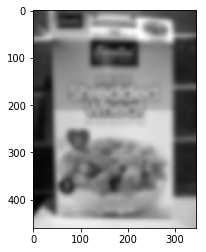

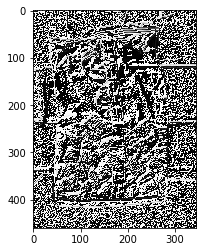

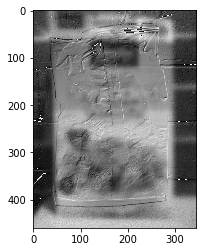

In [20]:
"""
low_pass_filt = generate_gaussian(low_pass_std)
high_pass_filt = generate_gaussian(high_pass_std)

n = len(high_pass_filt)
mid = int((n+1)/2)
new_filt = np.zeros((n,n))
new_filt[mid,mid] = 1
high_pass_filt = new_filt - high_pass_filt

low_pass_im1 = scipy.ndimage.convolve(image1, low_pass_filt) #scipy.ndimage.gaussian_filter(image1.astype(np.float32), low_pass_std, truncate=3.0)
high_pass_im2 = scipy.ndimage.convolve(image2, high_pass_filt) #scipy.ndimage.gaussian_laplace(image2.astype(np.float32), high_pass_std, truncate=3.0)

hybrid_img = low_pass_im1 + high_pass_im2
plt.imshow(low_pass_im1, cmap="gray")
plt.figure()
plt.imshow(high_pass_im2, cmap="gray")
plt.figure()
plt.imshow(hybrid_img, cmap="gray")
plt.show()

cv2.imshow("high_pass_im1", low_pass_im1.round().astype(np.uint8)) 
cv2.imshow("low_pass_m2",high_pass_im2.round().astype(np.uint8))
cv2.imshow("Hybrid",hybrid_img.round().astype(np.uint8))
cv2.waitKey(0)
cv2.destroyAllWindows()
"""
merge_images(image1, image2, low_pass_std, high_pass_std)

In [16]:
print("My example will hybridize the Earth's Moon with a picture of the Death Star from Star Wars.")
moon = cv2.imread('moon2.jpg',0)
deathstar = cv2.imread('deathstar1.jpg',0)

My example will hybridize the Earth's Moon with a picture of the Death Star from Star Wars.


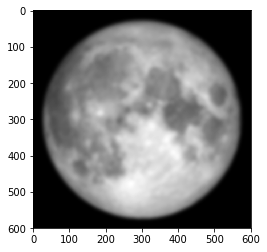

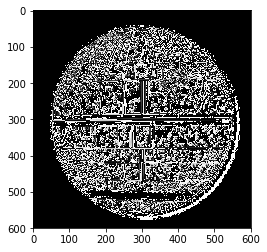

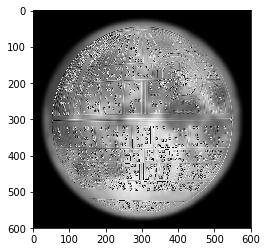

In [21]:
"""
high_pass_std = 1.0
moon = scipy.ndimage.gaussian_filter(moon.astype(np.float32), low_pass_std, truncate=3.0)
deathstar = scipy.ndimage.gaussian_laplace(deathstar.astype(np.float32), high_pass_std, truncate=3.0)

hybrid_img = moon + deathstar
plt.imshow(moon, cmap="gray")
plt.figure()
plt.imshow(deathstar, cmap="gray")
plt.figure()
plt.imshow(hybrid_img, cmap="gray")
plt.show()

cv2.imshow("moon", moon.round().astype(np.uint8)) 
cv2.imshow("deathstar", deathstar.round().astype(np.uint8))
cv2.imshow("Hybrid",hybrid_img.round().astype(np.uint8))
cv2.waitKey(0)
cv2.destroyAllWindows()
"""

high_pass_std = 0.5
low_pass_std = 5.0
merge_images(moon, deathstar, low_pass_std, high_pass_std)

In [25]:
print("My example will hybridize an apple and an orange")
apple = cv2.imread('apple26.jpg',0)
orange = cv2.imread('orange.png',0)

My example will hybridize an apple and an orange


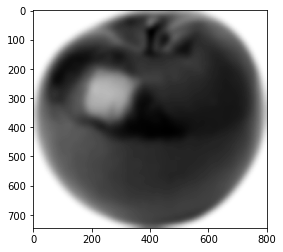

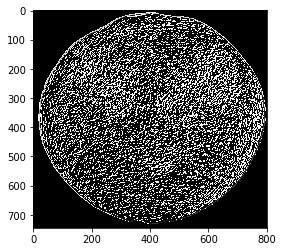

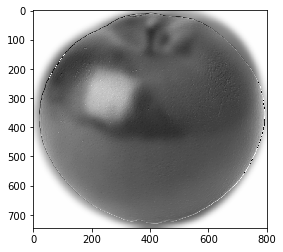

In [30]:
high_pass_std = 1.0
low_pass_std = 10.0
merge_images(apple, orange, low_pass_std, high_pass_std)